In [12]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


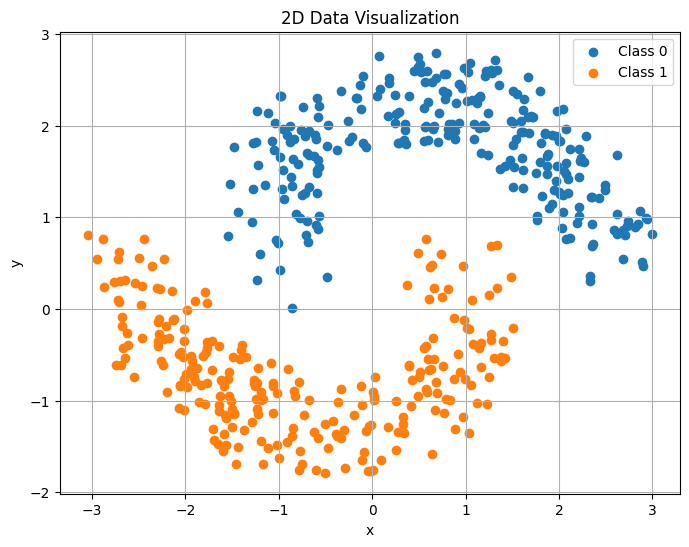

In [20]:
#Part one visulization
#Step1 impot libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset using the correct file name
file_path = '/content/drive/MyDrive/Data.csv'  # Ensure the file name matches exactly
column_names = ['x', 'y', 'label']  # Specify your own names here
data = pd.read_csv(file_path, header=None, names=column_names)




# Extract features and labels
x = data['x']
y = data['y']
labels = data['label']

# Plot the data points
plt.figure(figsize=(8, 6))
for label in labels.unique():
    plt.scatter(x[labels == label], y[labels == label], label=f'Class {label}')

plt.title('2D Data Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Training set size: 400
Test set size: 100
Training Accuracy: 0.97
Testing Accuracy: 0.97
Part 2 Results:
Training set size: 400
Test set size: 100
Training Accuracy: 0.97
Testing Accuracy: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


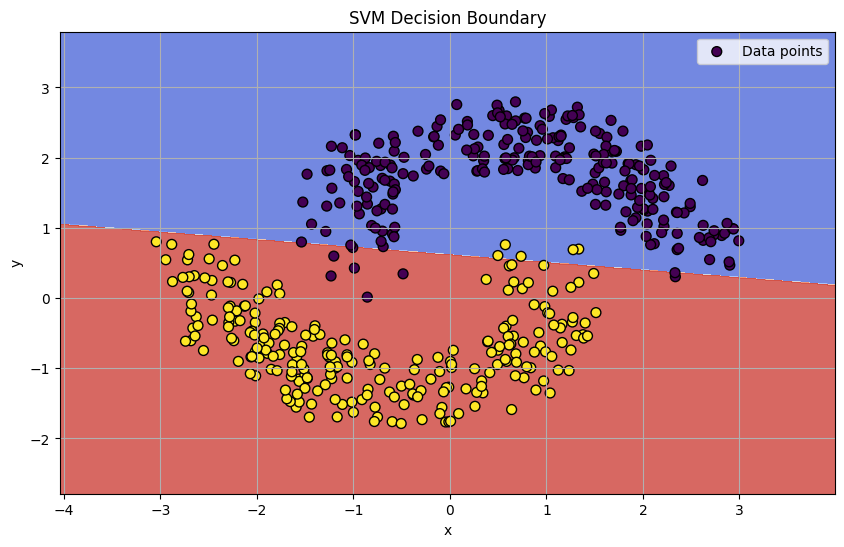

In [37]:
# Part 2: SVM without kernel
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Split the data into features and labels
X = data[['x', 'y']]  # Features: selecting 'x' and 'y' columns for input
y = data['label']      # Labels: selecting the 'label' column as output

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f'Training set size: {X_train.shape[0]}')  # Prints the number of training samples
print(f'Test set size: {X_test.shape[0]}')        # Prints the number of testing samples

from sklearn.svm import SVC  # Import the Support Vector Classifier
from sklearn.metrics import accuracy_score  # Import the accuracy metric

# Create and train a linear SVM model
svm_model = SVC(kernel='linear')  # Initialize the SVM with a linear kernel
svm_model.fit(X_train, y_train)  # Fit the model to the training data

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)  # Predict labels for training data
y_test_pred = svm_model.predict(X_test)    # Predict labels for testing data

# Calculate and print the accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy for training data
test_accuracy = accuracy_score(y_test, y_test_pred)      # Calculate accuracy for testing data

print(f'Training Accuracy: {train_accuracy:.2f}')  # Print training accuracy formatted to 2 decimal places
print(f'Testing Accuracy: {test_accuracy:.2f}')    # Print testing accuracy formatted to 2 decimal places

# Print the results of the model performance
print("Part 2 Results:")
print(f"Training set size: {len(X_train)}")  # Print size of the training set
print(f"Test set size: {len(X_test)}")        # Print size of the test set
print(f"Training Accuracy: {train_accuracy:.2f}")  # Print training accuracy
print(f"Testing Accuracy: {test_accuracy:.2f}")    # Print testing accuracy

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1  # Define limits for the x-axis
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1  # Define limits for the y-axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  # Create a mesh grid for x values
                     np.arange(y_min, y_max, 0.01))  # Create a mesh grid for y values

# Predict class labels for each point in the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict using the trained model on the mesh grid
Z = Z.reshape(xx.shape)  # Reshape the predicted labels to match the grid shape

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))  # Set the figure size
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Plot decision boundary
plt.scatter(X['x'], X['y'], c=y, edgecolors='k', marker='o', s=50, label='Data points')  # Plot data points
plt.title('SVM Decision Boundary')  # Set plot title
plt.xlabel('x')  # Label x-axis
plt.ylabel('y')  # Label y-axis
plt.legend()  # Show legend
plt.grid(True)  # Enable grid
plt.show()  # Display the plot


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


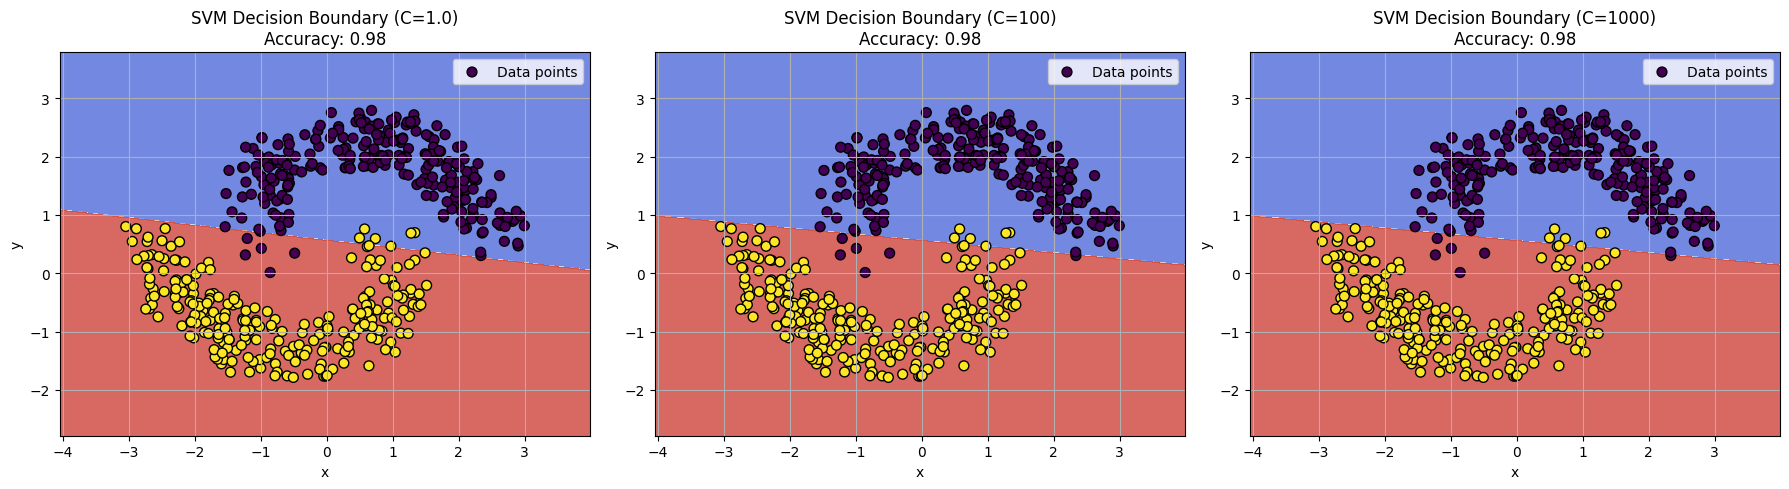

In [38]:
# Part 3: SVM with varying C values
from sklearn.svm import SVC  # Import the Support Vector Classifier
import matplotlib.pyplot as plt  # Import the plotting library
import numpy as np  # Import NumPy for numerical operations
from sklearn.metrics import accuracy_score  # Import the accuracy metric

def plot_svm_decision_boundary(X, y, C, ax):
    """
    Function to plot the decision boundary of an SVM model.

    Parameters:
    - X: Features (input data)
    - y: Labels (output data)
    - C: Regularization parameter for SVM
    - ax: Matplotlib axis to plot on
    """
    svm_model = SVC(kernel='linear', C=C)  # Initialize the SVM with a linear kernel and specified C value
    svm_model.fit(X, y)  # Fit the model to the data

    # Make predictions for the training set
    y_pred = svm_model.predict(X)  # Predict labels for the input features

    # Calculate accuracy of the model
    accuracy = accuracy_score(y, y_pred)  # Compare predictions with actual labels

    # Create a mesh grid for plotting the decision boundary
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1  # Define limits for x-axis
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1  # Define limits for y-axis
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  # Create a grid of x values
                         np.arange(y_min, y_max, 0.01))  # Create a grid of y values

    # Predict class labels for each point in the mesh grid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict using the trained model on the grid
    Z = Z.reshape(xx.shape)  # Reshape predictions to match the grid shape

    # Plot the decision boundary and margins
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Plot decision regions
    ax.scatter(X['x'], X['y'], c=y, edgecolors='k', marker='o', s=50, label='Data points')  # Plot data points
    ax.set_title(f'SVM Decision Boundary (C={C})\nAccuracy: {accuracy:.2f}')  # Set title with C value and accuracy
    ax.set_xlabel('x')  # Label x-axis
    ax.set_ylabel('y')  # Label y-axis
    ax.legend()  # Show legend
    ax.grid(True)  # Enable grid

# Plotting for different values of C
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create a figure with 3 subplots

C_values = [1.0, 100, 1000]  # List of different C values to test
for ax, C in zip(axes, C_values):  # Iterate over axes and C values
    plot_svm_decision_boundary(X, y, C, ax)  # Plot decision boundaries for each C value

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Display the plot


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


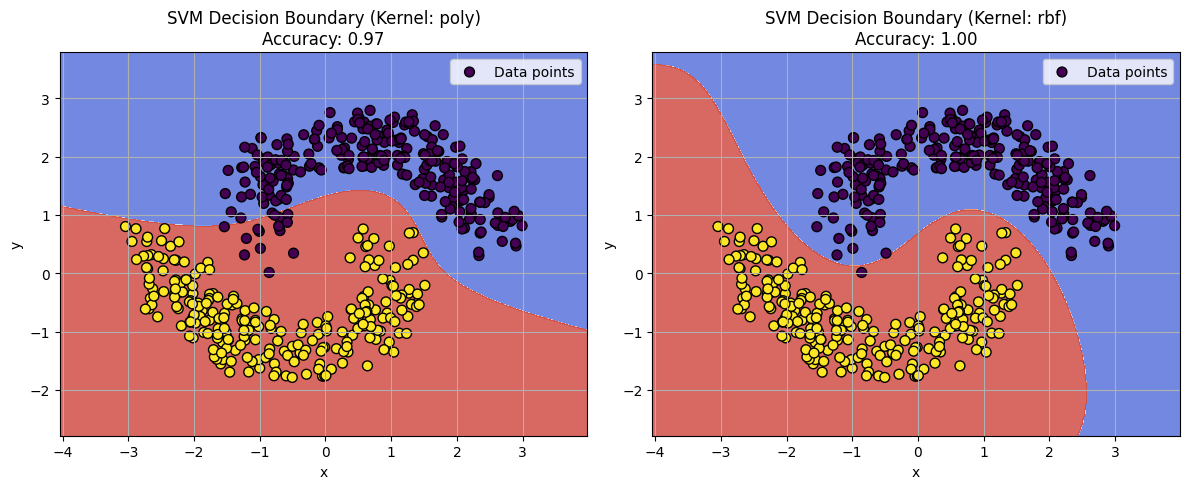

In [39]:
# Part 4: SVM with different kernels
from sklearn.svm import SVC  # Import the Support Vector Classifier
import matplotlib.pyplot as plt  # Import the plotting library
import numpy as np  # Import NumPy for numerical operations
from sklearn.metrics import accuracy_score  # Import the accuracy metric

def plot_svm_with_kernel(X, y, kernel_type, ax):
    """
    Function to plot the decision boundary of an SVM model with a specified kernel.

    Parameters:
    - X: Features (input data)
    - y: Labels (output data)
    - kernel_type: The type of kernel to use (e.g., 'linear', 'poly', 'rbf')
    - ax: Matplotlib axis to plot on
    """
    svm_model = SVC(kernel=kernel_type, C=1.0)  # Initialize the SVM with specified kernel and default C=1.0
    svm_model.fit(X, y)  # Fit the model to the data

    # Make predictions for the training set
    y_pred = svm_model.predict(X)  # Predict labels for the input features

    # Calculate accuracy of the model
    accuracy = accuracy_score(y, y_pred)  # Compare predictions with actual labels

    # Create a mesh grid for plotting the decision boundary
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1  # Define limits for x-axis
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1  # Define limits for y-axis
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  # Create a grid of x values
                         np.arange(y_min, y_max, 0.01))  # Create a grid of y values

    # Predict class labels for each point in the mesh grid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict using the trained model on the grid
    Z = Z.reshape(xx.shape)  # Reshape predictions to match the grid shape

    # Plot the decision boundary and margins
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Plot decision regions
    ax.scatter(X['x'], X['y'], c=y, edgecolors='k', marker='o', s=50, label='Data points')  # Plot data points
    ax.set_title(f'SVM Decision Boundary (Kernel: {kernel_type})\nAccuracy: {accuracy:.2f}')  # Set title with kernel type and accuracy
    ax.set_xlabel('x')  # Label x-axis
    ax.set_ylabel('y')  # Label y-axis
    ax.legend()  # Show legend
    ax.grid(True)  # Enable grid

# Plotting for different kernels
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots

kernels = ['poly', 'rbf']  # List of different kernel types to test
for ax, kernel in zip(axes, kernels):  # Iterate over axes and kernel types
    plot_svm_with_kernel(X, y, kernel, ax)  # Plot decision boundaries for each kernel

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Display the plot


Best parameters found:  {'C': 1, 'gamma': 1}
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        38
         1.0       1.00      1.00      1.00        37

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



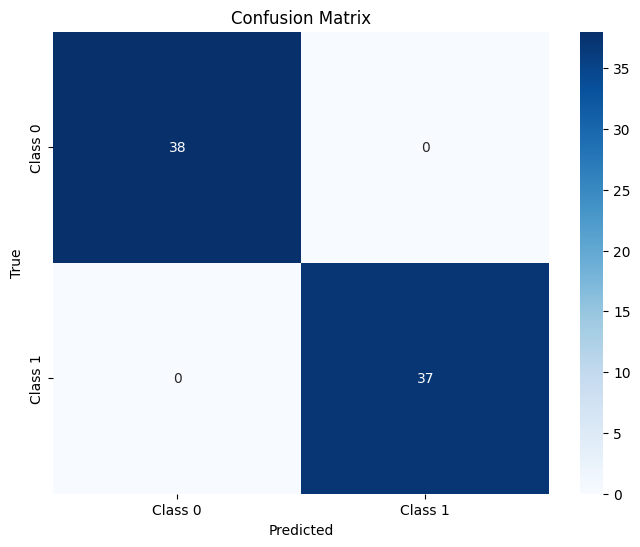

<ipython-input-32-001a76ddc00c>:76: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Test')


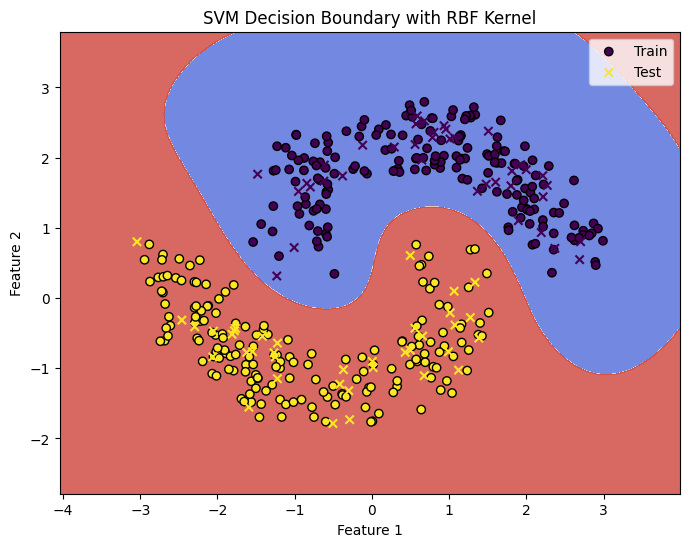

In [32]:
# Part 5: Training an SVM model with RBF kernel, parameter tuning, and evaluation
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import NumPy for numerical operations
from sklearn.model_selection import train_test_split, GridSearchCV  # Import train-test split and grid search
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Import evaluation metrics
import seaborn as sns  # Import seaborn for visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Assuming 'data' is your DataFrame with features and labels
# If your data is in a DataFrame without headers
X = data.values[:, :-1]  # Select all columns except the last one as features
y = data.values[:, -1]   # Select the last column as labels

# Check if X is 2D; if not, reshape it
if X.ndim == 1:
    X = X.reshape(-1, 1)  # Reshape to ensure X is 2D

# Split the data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validation, 15% testing

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Initialize SVM with RBF kernel and default parameters
svm_model.fit(X_train, y_train)  # Fit the model to the training data

# Parameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Values for regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]  # Values for gamma parameter
}

# Initialize GridSearchCV for parameter tuning
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_val, y_val)  # Fit GridSearchCV on validation set

# Get the best parameters from grid search
best_params = grid_search.best_params_  # Retrieve the best parameters found
print("Best parameters found: ", best_params)  # Print the best parameters

# Train the SVM model with the best parameters
svm_best_model = SVC(kernel='rbf', **best_params)  # Initialize SVM with best parameters
svm_best_model.fit(X_train, y_train)  # Fit the best model to the training data

# Make predictions on the test set
y_pred = svm_best_model.predict(X_test)  # Predict labels for the test set

# Evaluation of the model
print("Classification Report:")  # Print classification report
print(classification_report(y_test, y_pred))  # Display precision, recall, and F1-score

# Confusion matrix visualization
confusion_mat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])  # Plot heatmap
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('True')  # Label y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Show the plot

# Plotting the decision boundaries
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Define limits for x-axis (first feature)
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Define limits for y-axis (second feature)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  # Create a grid of x values
                     np.arange(y_min, y_max, 0.01))  # Create a grid of y values

# Predict the class for each point in the mesh grid
Z = svm_best_model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict using the trained model on the grid
Z = Z.reshape(xx.shape)  # Reshape predictions to match the grid shape

# Plot the decision boundary and training points
plt.figure(figsize=(8, 6))  # Set figure size
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Plot decision regions
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')  # Plot training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Test')  # Plot test points
plt.xlabel('Feature 1')  # Label for the x-axis
plt.ylabel('Feature 2')  # Label for the y-axis
plt.title('SVM Decision Boundary with RBF Kernel')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot


False Positive Rate (FPR): [0. 0. 0. 1.]
True Positive Rate (TPR): [0.         0.02702703 1.         1.        ]
Thresholds: [           inf 9.99998586e-01 8.75973670e-01 5.10541702e-04]
Area under the ROC curve (AUC): 1.0


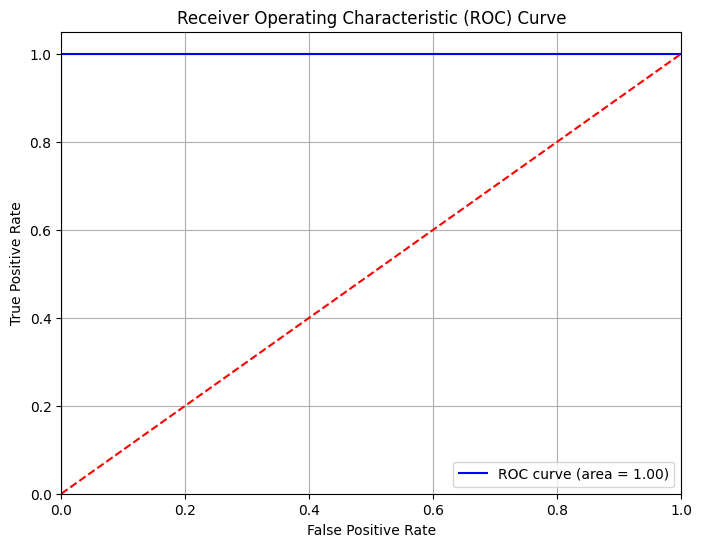

In [36]:
## Part 6: Generate the ROC Curve

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your data is in a DataFrame called 'data'
X = data.values[:, :-1]  # Features: all columns except the last
y = data.values[:, -1]   # Labels: the last column

# Split the data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the SVM model with RBF kernel and enable probability estimates
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print ROC curve values
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("Thresholds:", thresholds)
print("Area under the ROC curve (AUC):", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
